# Projeto 3 

## Manuel Castanares & Luis Filipe Carrete



In [114]:
import math
import pandas as pd
from random import shuffle
import matplotlib.pyplot as plt
import numpy as np

In [46]:
dados = pd.read_csv('IMDB-Movie-Data.csv')

In [47]:
dados

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0


## Análise Exploratória: 

In [100]:
dados[['genero1','genero2','genero3']] = dados.Genre.str.split(",",expand=True,)

dados

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,genero1,genero2,genero3
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Action,Adventure,Sci-Fi
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Adventure,Mystery,Sci-Fi
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Horror,Thriller,None
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Animation,Comedy,Family
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Action,Adventure,Fantasy
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0,Action,Adventure,Fantasy
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0,Comedy,Drama,Music
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0,Comedy,None,None
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0,Action,Adventure,Biography
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0,Adventure,Drama,Romance


In [158]:
dados.genero1.append(dados.genero2).append(dados.genero3).value_counts()
top_genero = ['Drama', 'Action', 'Comedy', 'Adventure', 'Thriller']


In [159]:
dados_drama = dados.loc[(dados.genero1 == "Drama") | (dados.genero2 == "Drama") | (dados.genero3 == "Drama")]

media_drama = dados_drama.Rating.mean()

dados_action = dados.loc[(dados.genero1 == "Action") | (dados.genero2 == "Action") | (dados.genero3 == "Action")]

media_action = dados_action.Rating.mean()

dados_comedy = dados.loc[(dados.genero1 == "Comedy") | (dados.genero2 == "Comedy") | (dados.genero3 == "Comedy")]

media_comedy = dados_comedy.Rating.mean()

dados_adv = dados.loc[(dados.genero1 == "Adventure") | (dados.genero2 == "Adventure") | (dados.genero3 == "Adventure")]

media_adv = dados_adv.Rating.mean()

dados_thri = dados.loc[(dados.genero1 == "Thriller") | (dados.genero2 == "Thriller") | (dados.genero3 == "Thriller")]

media_thri = dados_thri.Rating.mean()

medias=[media_drama, media_action, media_comedy, media_adv, media_thri]

dados

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,genero1,genero2,genero3
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Action,Adventure,Sci-Fi
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Adventure,Mystery,Sci-Fi
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Horror,Thriller,None
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Animation,Comedy,Family
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Action,Adventure,Fantasy
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0,Action,Adventure,Fantasy
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0,Comedy,Drama,Music
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0,Comedy,None,None
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0,Action,Adventure,Biography
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0,Adventure,Drama,Romance


<function matplotlib.pyplot.show(*args, **kw)>

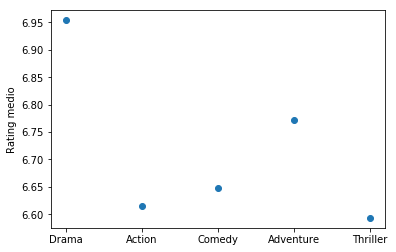

In [160]:
x = np.arange(1,6,1)

plt.plot(x, medias, "o")
plt.ylabel("Rating medio")
plt.xticks(x, top_genero)
plt.show


In [141]:
dados_na = dados.dropna()

Rating

count    1000.000000
mean        6.723200
std         0.945429
min         1.900000
25%         6.200000
50%         6.800000
75%         7.400000
max         9.000000
Name: Rating, dtype: float64

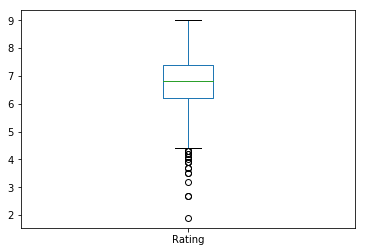

In [142]:
r = dados["Rating"]
r.plot.box()
r.describe()

Média das notas estão acima de 5 e o desvio padrão é de quase 1

Revenue

Text(0, 0.5, 'Revenue')

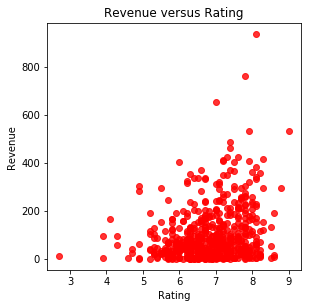

In [143]:
re = dados_na["Rating"]
z = dados_na["Revenue (Millions)"]
fig = plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.scatter(re, z, c='red', alpha=0.8)
plt.title('Revenue versus Rating')
plt.xlabel('Rating')
plt.ylabel('Revenue')

In [144]:
print("Correlação entre Rating e Revenue:",np.corrcoef(re, z)[0,1])

Correlação entre Rating e Revenue: 0.2256595818070043


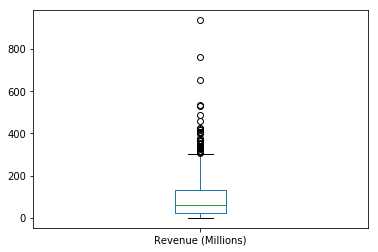

In [145]:
z.plot.box()

Runtime

Text(0, 0.5, 'Runtime')

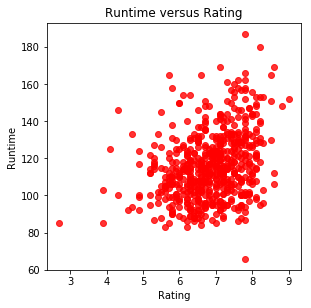

In [146]:
run = dados_na["Runtime (Minutes)"]

fig = plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.scatter(re, run, c='red', alpha=0.8)
plt.title('Runtime versus Rating')
plt.xlabel('Rating')
plt.ylabel('Runtime')

In [147]:
print("Correlação entre Rating e Runtime:",np.corrcoef(re, run)[0,1])

Correlação entre Rating e Runtime: 0.3121538367890543


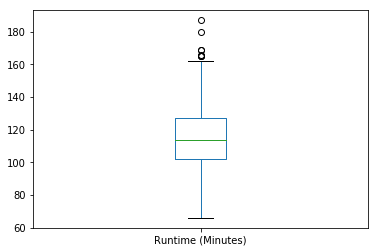

In [148]:
run.plot.box()

Votes

Text(0, 0.5, 'Votes')

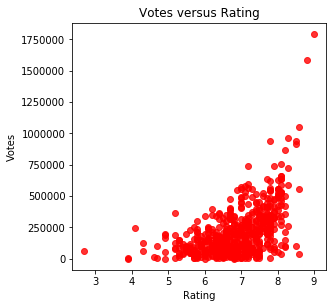

In [149]:
a = dados_na["Votes"]

fig = plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.scatter(re, a, c='red', alpha=0.8)
plt.title('Votes versus Rating')
plt.xlabel('Rating')
plt.ylabel('Votes')

In [150]:
print("Correlação entre Rating e Votos:", np.corrcoef(re, a)[0,1])

Correlação entre Rating e Votos: 0.5327789203181783


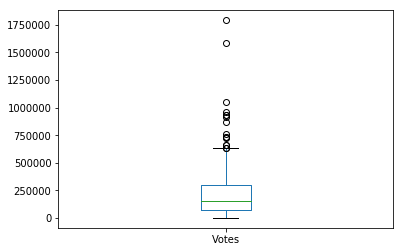

In [151]:
a.plot.box()